In [1]:
pip install pandas numpy

In [2]:
import pandas as pd
import numpy as np

def topsis(file,wts,imp):
    df=pd.read_csv(file)
    models=df.iloc[:,0]
    mat=df.iloc[:,1:].values.astype(float)

    w=np.array([float(i) for i in wts.split(',')])
    impacts=imp.split(',')

    norm=mat/np.sqrt((mat**2).sum(axis=0))

    wmat=norm*w

    ideal_pos=[]
    ideal_neg=[]

    for i in range(len(impacts)):
        if impacts[i]=='+':
            ideal_pos.append(max(wmat[:,i]))
            ideal_neg.append(min(wmat[:,i]))
        else:
            ideal_pos.append(min(wmat[:,i]))
            ideal_neg.append(max(wmat[:,i]))

    ideal_pos=np.array(ideal_pos)
    ideal_neg=np.array(ideal_neg)

    d_pos=np.sqrt(((wmat-ideal_pos)**2).sum(axis=1))
    d_neg=np.sqrt(((wmat-ideal_neg)**2).sum(axis=1))

    score=d_neg/(d_pos+d_neg)

    df['TopsisScore']=score
    df['Rank']=score.argsort()[::-1].argsort()+1

    df.to_csv('result.csv',index=False)
    print(df.sort_values(by='Rank'))

if __name__=='__main__':
    topsis('/content/data.csv',
           '0.20,0.15,0.20,0.10,0.10,0.10,0.10,0.05',
           '+,-,+,-,-,+,-,-')

             Model  BLEU  PPL  HumanScore  SizeMB  ParamsM  MaxTokens  \
3  BlenderBot-400M  24.1   25         4.4    1500      400       2048   
5     FLAN-T5-base  22.5   27         4.0     990      250       2048   
6    FLAN-T5-large  25.8   20         4.5    1800      780       2048   
4    BlenderBot-1B  26.3   19         4.6    2500     1000       2048   
1  DialoGPT-medium  21.5   28         4.1     762      355       1024   
2   DialoGPT-large  23.8   22         4.3    1550      762       1024   
7         mT5-base  20.1   30         3.9    1200      300       1024   
8     GPT-2-medium  19.4   32         3.7     800      345       1024   
0   DialoGPT-small  18.2   35         3.8     345      117       1024   
9         LLaMA-7B  27.5   17         4.8   13000     7000       4096   

   SpeedMS  MemoryGB  TopsisScore  Rank  
3      150         6     0.765653     1  
5      130         5     0.762001     2  
6      190         9     0.749030     3  
4      210        10     0.7

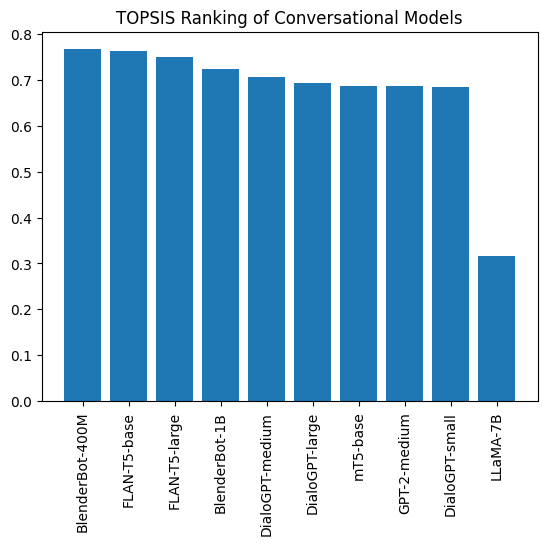

In [3]:
import matplotlib.pyplot as plt

res=pd.read_csv('result.csv')
res=res.sort_values('Rank')

plt.bar(res['Model'],res['TopsisScore'])
plt.xticks(rotation=90)
plt.title('TOPSIS Ranking of Conversational Models')
plt.show()